# Kaggle - Titanic - Machine Learning from Disaster

The Titanic dataset is one of the most popular datasets used in machine learning for binary classification problems. The task is to predict which passengers survived the Titanic disaster based on various features. I’ll guide you through the steps of Exploratory Data Analysis (EDA), modeling, evaluation, and submission for the Titanic problem.

Let's break the solution into three main parts:

1. Exploratory Data Analysis (EDA) & Feature Engineering
2. Modeling and Evaluation
3. Submitting Predictions on Kaggle

In [ ]:
! pip install pandas matplotlib seaborn scikit-learn xgboost

## EDA
Kaggle provides the Titanic dataset for training and testing. You can download the dataset from [Kaggle Titanic Competition](https://www.kaggle.com/competitions/titanic/data).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_path = '/content/drive/MyDrive/GFG/122. Your First Kaggle Project/data/titanic/train.csv'
test_path = '/content/drive/MyDrive/GFG/122. Your First Kaggle Project/data/titanic/test.csv'

# Load train and test data
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Inspect the data
print(train.head())
print(train.info())
print(train.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### Missing Values

In [ ]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


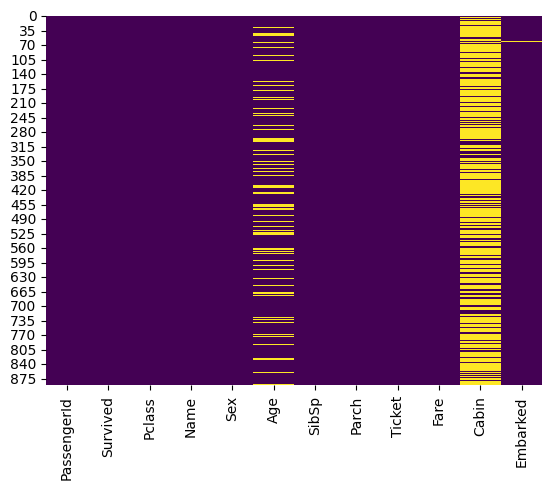

In [ ]:
# Check for missing values
print(train.isna().sum())

# Visualize missing values
sns.heatmap(train.isna(), cbar=False, cmap='viridis')
plt.show()

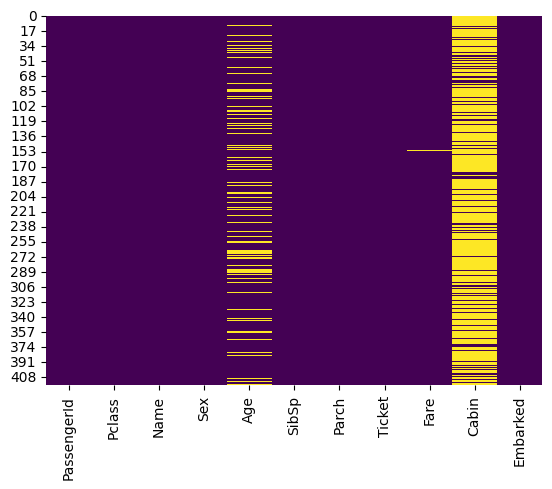

In [ ]:
# Visualize missing values
sns.heatmap(test.isna(), cbar=False, cmap='viridis')
plt.show()

### Visualize Relationships

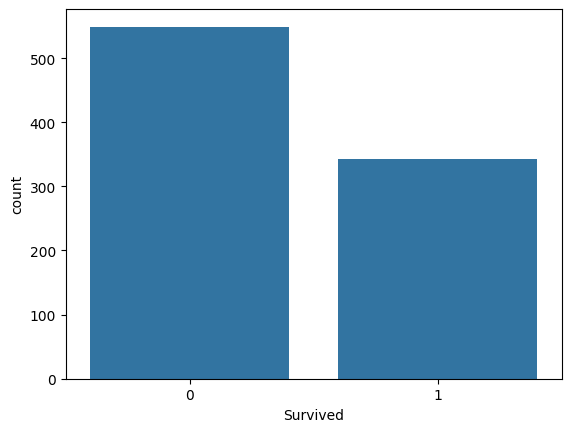

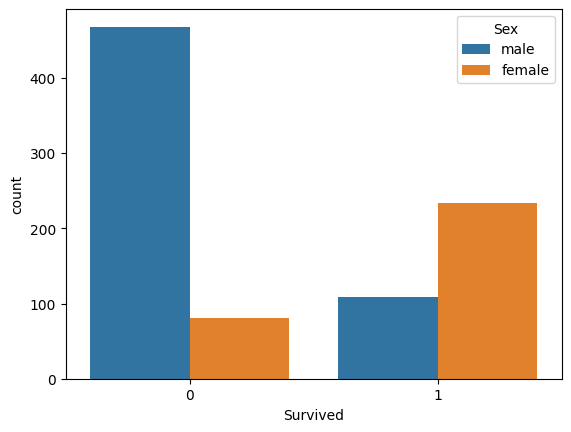

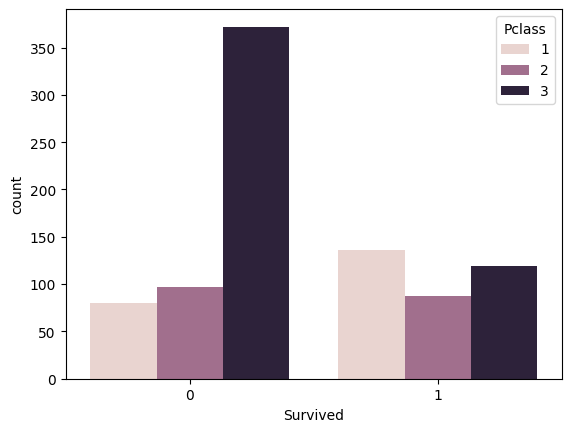

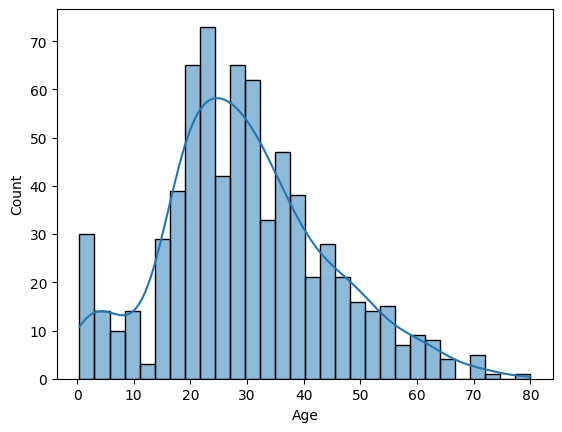

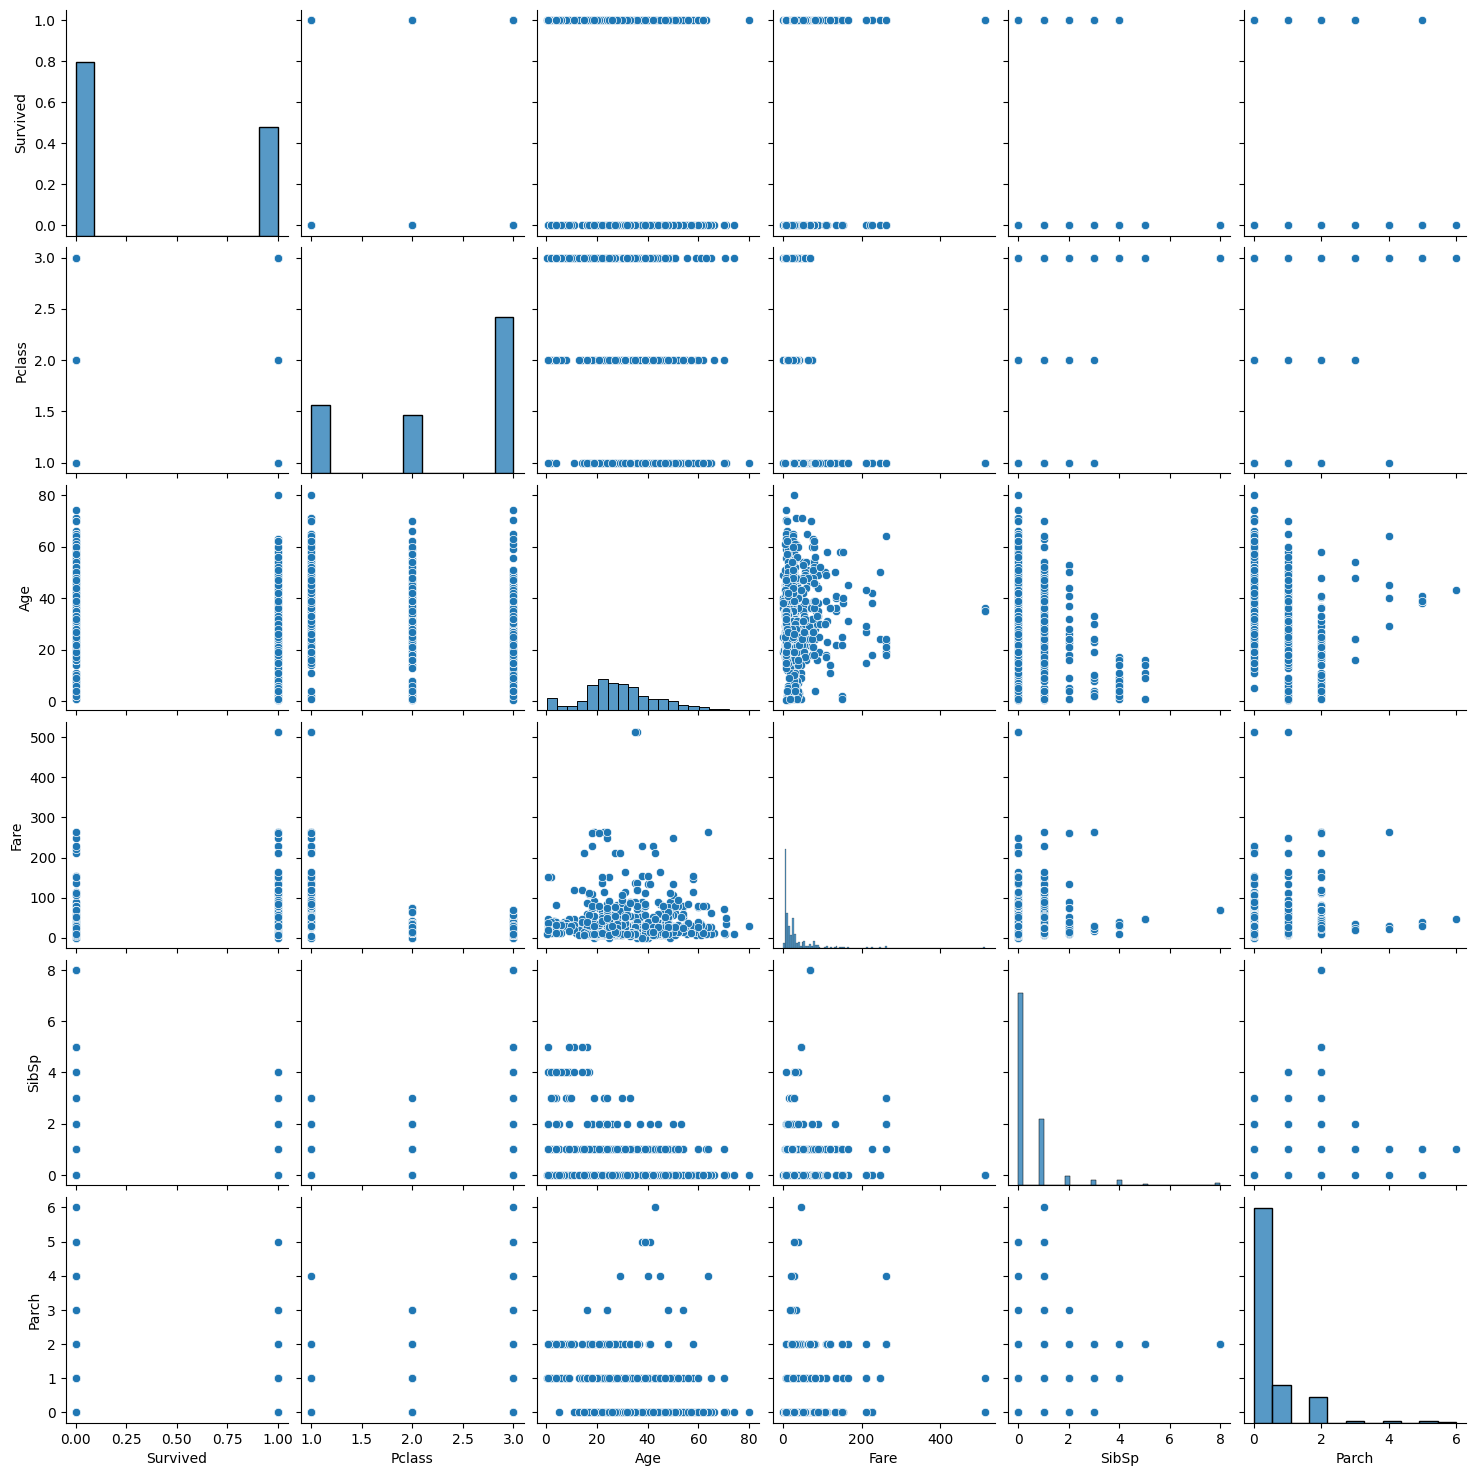

In [ ]:
# Survived vs Not Survived
sns.countplot(data=train, x='Survived')
plt.show()

# Survival rate by Sex
sns.countplot(data=train, x='Survived', hue='Sex')
plt.show()

# Survival rate by Passenger Class
sns.countplot(data=train, x='Survived', hue='Pclass')
plt.show()

# Age distribution
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.show()

# Pairplot to see relations between numeric features
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

## Feature Engineering

### Handle Missing Data

In [ ]:
# Fill missing 'Age' values with the median age
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent value)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' as it has too many missing values
train.drop(columns='Cabin', inplace=True)
test.drop(columns='Cabin', inplace=True)

/tmp/ipython-input-48-1946444989.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
/tmp/ipython-input-48-1946444989.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

### Encoding Categorical Variables

In [ ]:
# Convert 'Sex' to numerical values
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to 'Age' and 'Fare'
scaler = StandardScaler()

train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

## Modeling and Evaluation

### Split Columns

In [ ]:
# Define features (drop columns that aren't needed)
X = train.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = train['Survived']

# Define test features (similarly dropping unused columns)
X_test = test.drop(columns=['PassengerId', 'Name', 'Ticket'])

### Train-Test Split for Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_val, y_pred)}")
print(f"Classification Report:\n {classification_report(y_val, y_pred)}")

Validation Accuracy: 0.8156424581005587
Confusion Matrix:
 [[90 15]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



### Hyperparameter Tuning (optional)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
# Fit the grid search
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


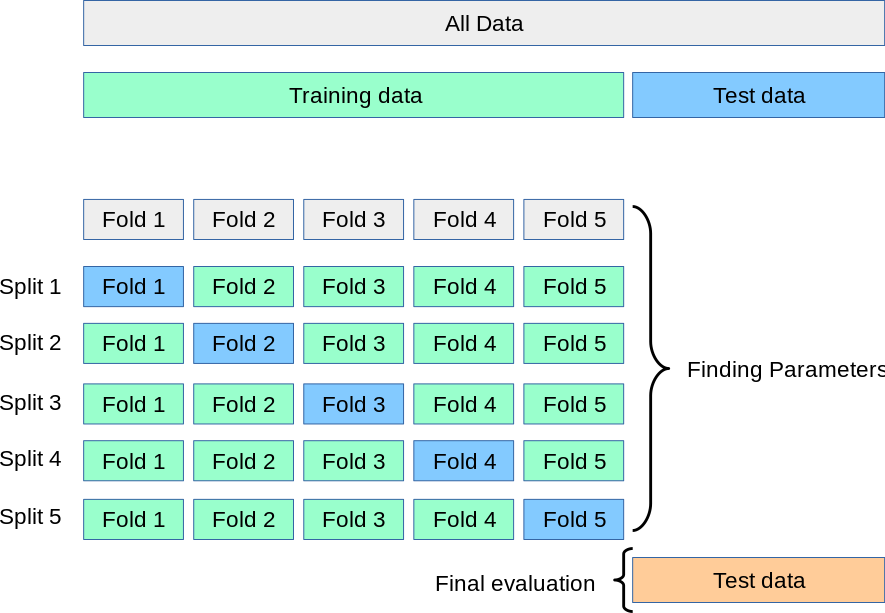

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
# Predict on the test set
test_predictions = best_model.predict(X_test)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('titanic_submission.csv', index=False)

# Submitting Predictions on Kaggle
To submit your predictions:
0. Download the titanic_submission.csv to your local.
1. Go to the Titanic competition page.
2. Upload the titanic_submission.csv file that you created.
3. Click on "Submit" to see your score on the leaderboard.

# Spaceship Titanic

## Import the library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [ ]:
# Load a dataset into a Pandas Dataframe
df_train = pd.read_csv('/content/drive/MyDrive/GFG/122. Your First Kaggle Project/data/spaceship_titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/GFG/122. Your First Kaggle Project/data/spaceship_titanic/test.csv')
print("Full train dataset shape is {}".format(df_train.shape))

Full train dataset shape is (8693, 14)


## Let us quickly do a basic exploration of the dataset

The data is composed of 14 columns and 8693 entries. We can see all 14 dimensions of our dataset by printing out the first 5 entries using the following code:

In [ ]:
# Display the first 5 examples
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


There are 12 feature columns. Using these features your model has to predict whether the passenger is rescued or not indicated by the column `Transported`.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Bar chart for label column: Transported



<Axes: xlabel='Transported'>

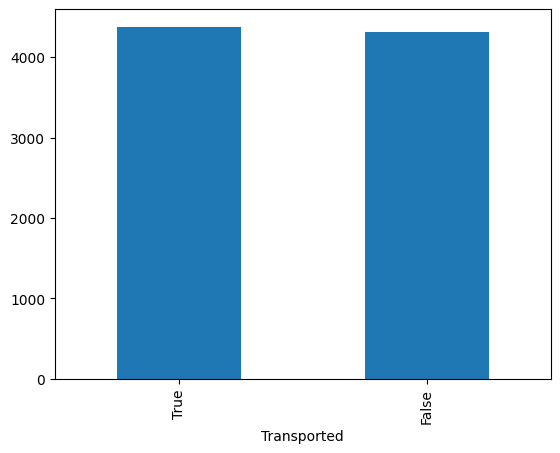

In [ ]:
plot_df = df_train.Transported.value_counts()
plot_df.plot(kind="bar")

## Numerical data distribution

Let us plot all the numerical columns and their value counts:

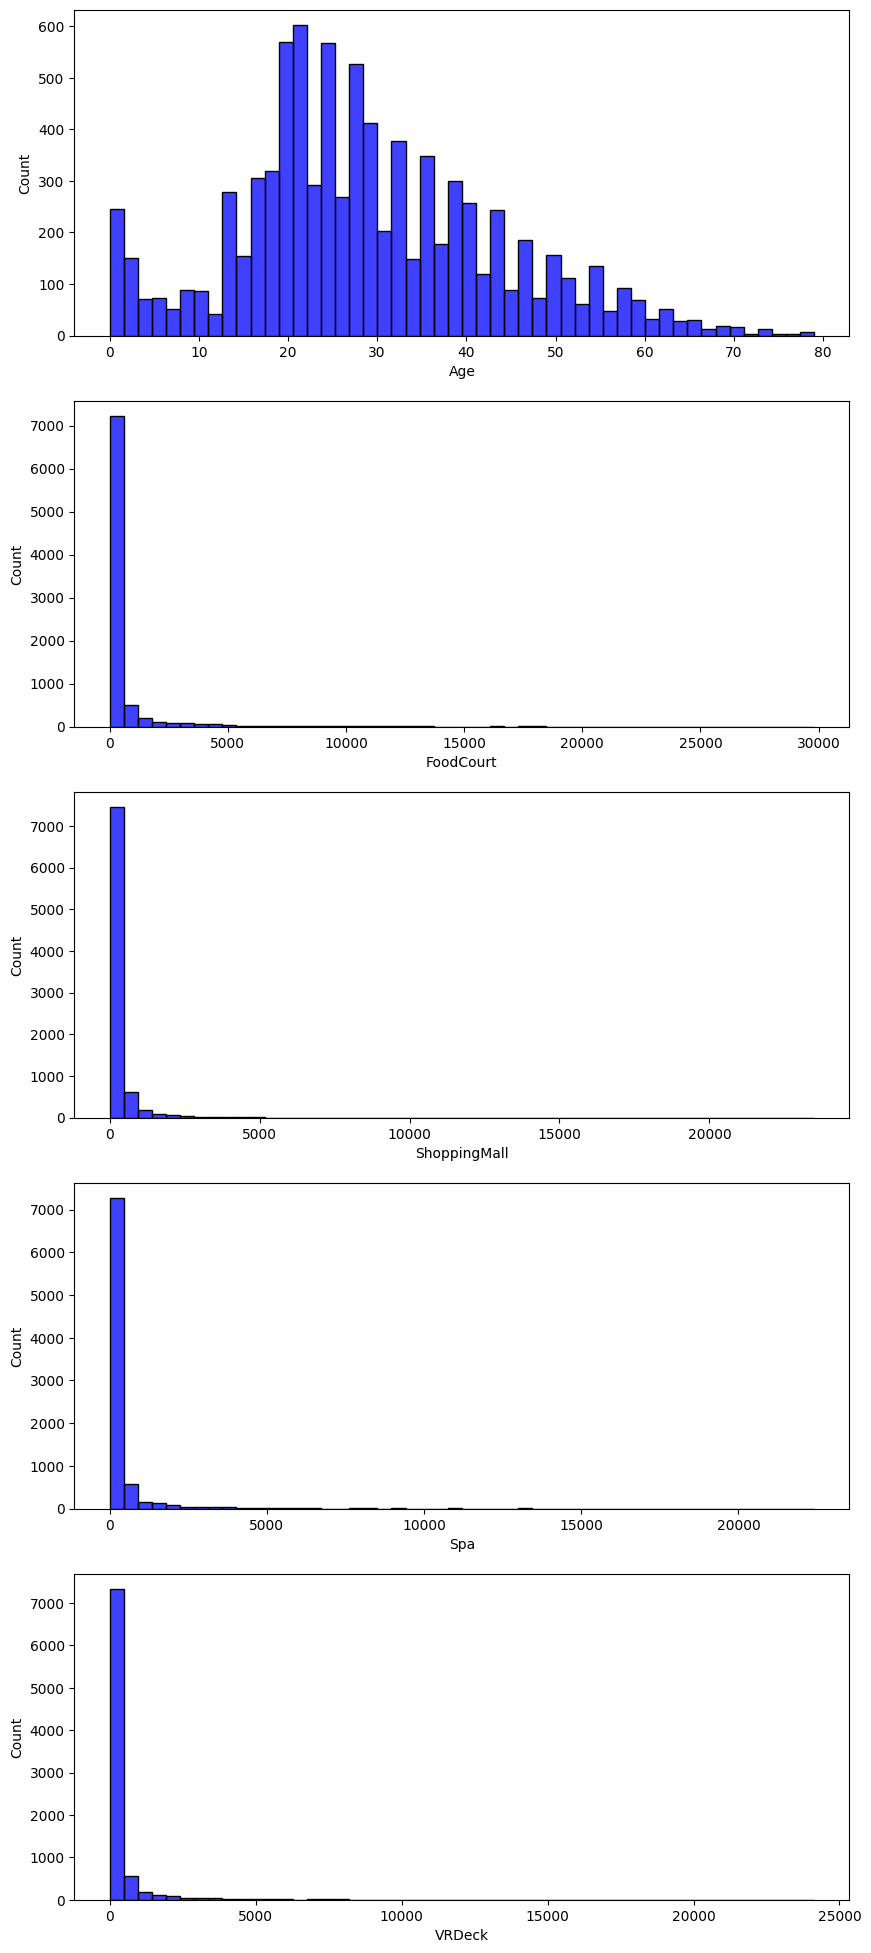

In [ ]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df_train['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df_train['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df_train['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df_train['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df_train['VRDeck'], color='b', bins=50, ax=ax[4]);

## Prepare the dataset

We will drop both `PassengerId` and `Name` columns as they are not necessary for model training.

In [ ]:
df_train = df_train.drop(['PassengerId', 'Name'], axis=1)
df_train.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


We will check for the missing values using the following code:

In [ ]:
df_train.isna().sum().sort_values(ascending=False)

,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Cabin,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182
RoomService,181


In [ ]:
df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']] = df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']].fillna(value=0)
df_train.isna().sum().sort_values(ascending=False)

,0
HomePlanet,201
Cabin,199
Destination,182
Age,179
CryoSleep,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [ ]:
df_train["Transported"] = df_train["Transported"].astype(int)

We will also convert the boolean fields `CryoSleep` and `VIP` to int.

In [ ]:
df_train['VIP'] = df_train['VIP'].astype(int)
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)

The value of column `Cabin` is a string with the format `Deck/Cabin_num/Side`. Here we will split the `Cabin` column and create 3 new columns `Deck`, `Cabin_num` and `Side`, since it will be easier to train the model on those individual data.

Run the following command to split the column `Cabin` into columns `Deck`, `Cabin_num` and `Side`

In [ ]:
df_train[["Deck", "Cabin_num", "Side"]] = df_train["Cabin"].str.split("/", expand=True)

Remove original `Cabin` column from the dataset since it's not needed anymore.

In [ ]:
df_train = df_train.drop('Cabin', axis=1)

Let us display the first 5 examples from the prepared dataset.

In [ ]:
df_train.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [ ]:
df_train.isna().sum()[df_train.isna().sum() > 0]

,0
HomePlanet,201
Destination,182
Age,179
Deck,199
Cabin_num,199
Side,199


In [ ]:
columns_to_impute = ['Age', 'Cabin_num']

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_train[columns_to_impute] = imputer.fit_transform(df_train[columns_to_impute])

df_train.isna().sum().sort_values(ascending=False)

,0
HomePlanet,201
Side,199
Deck,199
Destination,182
CryoSleep,0
Age,0
RoomService,0
VIP,0
FoodCourt,0
ShoppingMall,0


In [ ]:
df_train = pd.get_dummies(df_train, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], dummy_na=False)
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0.0,...,False,False,False,False,False,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
for col in df_train.columns:
    if df_train[col].dtype == 'bool':
        df_train[col] = df_train[col].astype(int)

df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df_train.drop(columns = 'Transported')
y = df_train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()

In [ ]:
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7757331799884991

In [ ]:
model_dt.fit(X_train, y_train)
pred = model_dt.predict(X_test)
accuracy_score(y_test, pred)

0.7418056354226567

In [ ]:
model_rf.fit(X_train, y_train)
pred = model_rf.predict(X_test)
accuracy_score(y_test, pred)

0.7906843013225991

In [ ]:
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)
accuracy_score(y_test, pred)

0.8010350776308223

In [ ]:
model_lgbm.fit(X_train, y_train)
pred = model_lgbm.predict(X_test)
accuracy_score(y_test, pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1664
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


0.8021851638872916